# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')
library('ggrepel')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
measles <- read_csv('measles.csv')
head(measles)

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here

df_vacc_rates = measles |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(above_95 = sum(mmr > 95, na.rm = TRUE)/n())
df_vacc_rates |> head()

state,above_95
<chr>,<dbl>
Arizona,0.496157131
Arkansas,0.003527337
California,0.730966608
Colorado,0.621101526
Connecticut,0.806451613
Illinois,0.896304970


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [4]:
df_vacc_rates |>
    arrange(above_95) |>
    slice(1)

# Arkansas has the smallest fraction of schools above the CDC target vaccination rate of 95%.

state,above_95
<chr>,<dbl>
Arkansas,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

In [5]:
ecdf = measles |>
    filter(state == 'North Carolina') |>
    mutate(cume_dist = cume_dist(overall))
ecdf |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,cume_dist
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,North Carolina,2018-19,A T Allen Elementary,NA,NA,Cabarrus,NA,132,-1,100,NA,NA,NA,35.36238,-80.51297,1
2,North Carolina,2018-19,A.C.E. Academy,NA,NA,Cabarrus,NA,44,-1,100,NA,NA,NA,35.30806,-80.67281,1
3,North Carolina,2018-19,ABC of NC Child Develop. Ctr,NA,NA,Davidson,NA,1,-1,100,NA,NA,NA,35.99481,-80.27403,1
4,North Carolina,2018-19,Agape Christian,NA,NA,Ashe,NA,3,-1,100,NA,NA,NA,36.42064,-81.48704,1
5,North Carolina,2018-19,Agape International Christian Academy,NA,NA,Franklin,NA,1,-1,100,NA,NA,NA,36.03484,-78.49820,1
6,North Carolina,2018-19,Ahoskie Christian,NA,NA,Hertford,NA,32,-1,100,NA,NA,NA,36.27857,-76.97674,1


Warning message in geom_text_repel(aes(x = 95, y = 0.5, label = "CDC recommended vaccination rate (95%)")):
“All aesthetics have length 1, but the data has 2085 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message:
“ggrepel: 2085 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


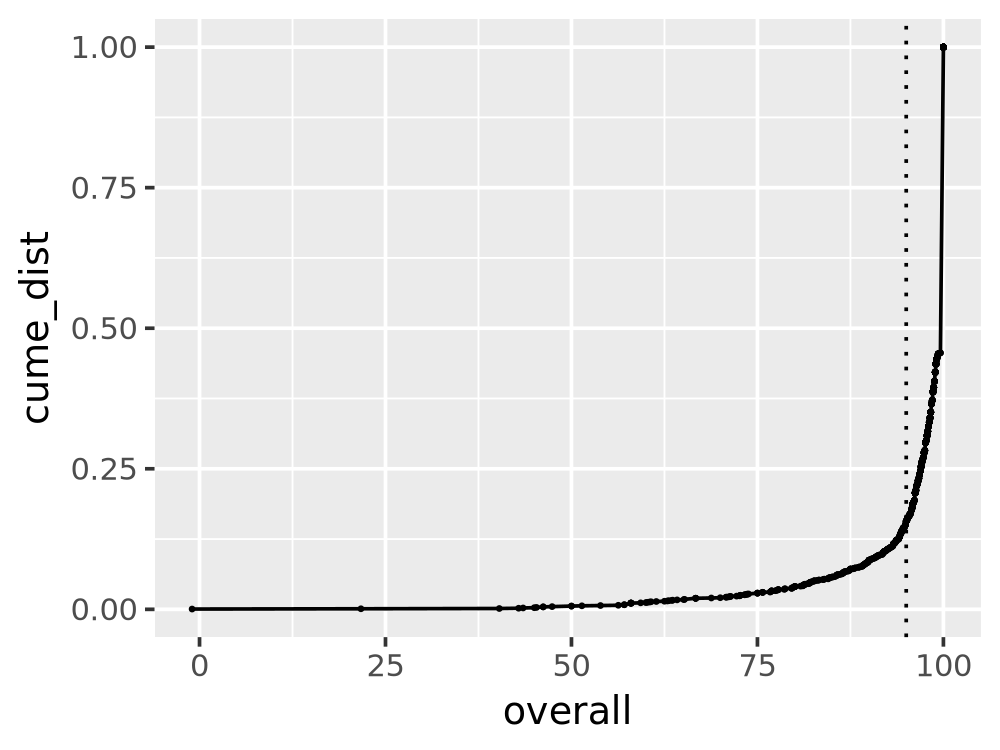

In [16]:
ggplot(ecdf, aes(x = overall, y = cume_dist)) +
    geom_point(na.rm = TRUE, size = 0.25) +
    geom_line(na.rm = TRUE) +
    geom_vline(xintercept = 95, linetype = "dotted") +
    geom_text_repel(
    aes(x = 95, y = 0.5, label = "CDC recommended vaccination rate (95%)"))


Warning message in geom_curve(aes(x = 90, y = 0.5, xend = 80, yend = 0.8), curvature = -0.2, :
“All aesthetics have length 1, but the data has 2085 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


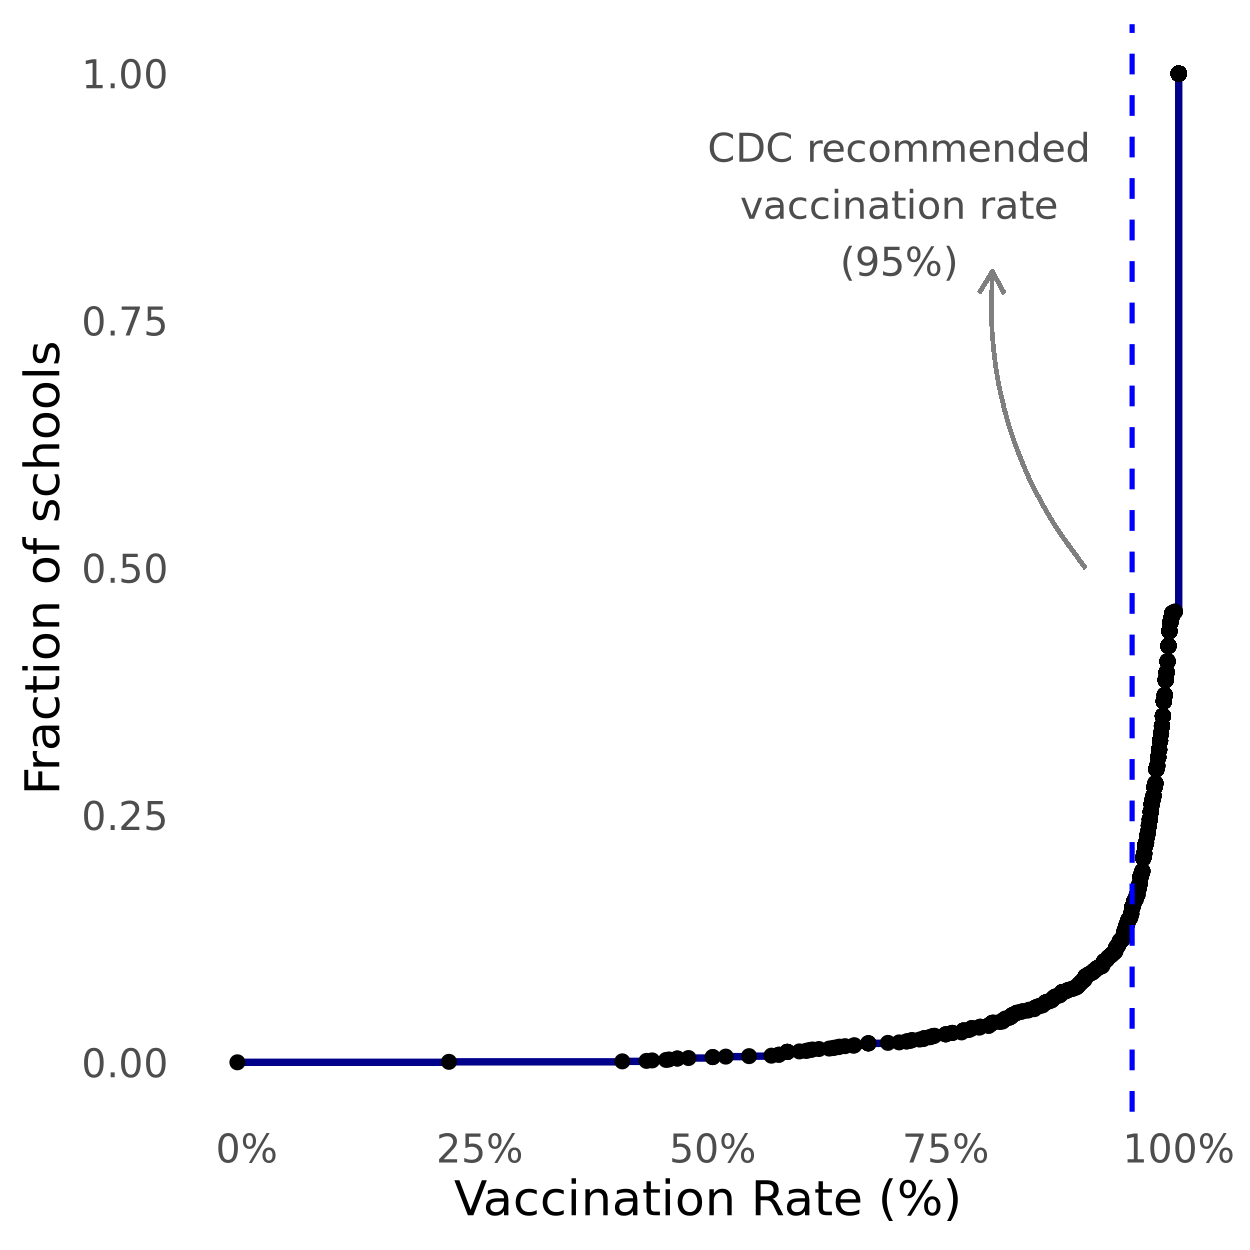

In [90]:
options(repr.plot.height = 5, repr.plot.width = 5)

ggplot(ecdf, aes(x = overall, y = cume_dist)) +
    geom_step(color = "darkblue", size = 1) +
    geom_point(color = "darkblue", fill = ) +
    geom_vline(xintercept = 95, linetype = "dashed", color = "blue", size = 0.7) +
    geom_text_repel(
        data = data.frame(x = 65, y = 0.78),
        aes(x = x, y = y, label = "CDC recommended\nvaccination rate\n(95%)"),
        nudge_x = 5, color = "gray30", size = 4,
        direction = "y", segment.color = "gray50") +
    geom_curve(
        aes(x = 90, y = 0.5, xend = 80, yend = 0.8),
        curvature = -0.2, color = "gray50", size = 0.5,
        arrow = arrow(length = unit(0.1, "inches"))) +
    theme_minimal(base_size = 14) +
    theme(
        panel.grid.major = element_line(color = "white"),
        panel.grid.minor = element_blank()) +
    labs(x = 'Vaccination Rate (%)', y = 'Fraction of schools') +
    scale_x_continuous(labels = scales::percent_format(scale = 1))
    

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [23]:
median(ecdf$overall)

# 100 > 95, so the median vaccination rate for NC schools is above the CDC recommended target.

[1] 100